### CV Practical Guide (Image Intensity & Geometric Transformations)

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
img_rgb = cv2.imread("D:/water.jpg")

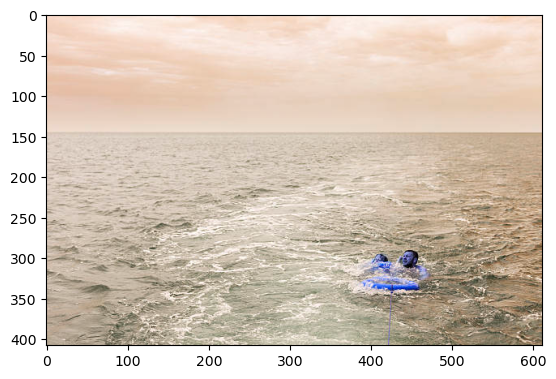

In [39]:
plt.imshow(img_rgb)

In [3]:
img = cv2.imread("D:/water.jpg",0)

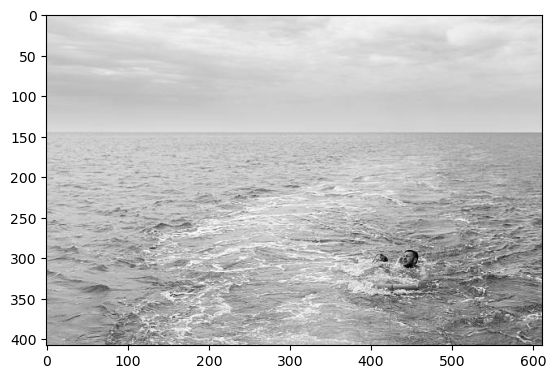

In [7]:
plt.imshow(img,cmap='gray')

In [6]:
img.shape

(408, 612)

In [8]:
rows , cols = img.shape

In [9]:
x,y,w,h = 320,250,230,360

In [10]:
# Image After cropping acc/to the above co-ordinates

In [11]:
cropped_img = img[y:y+h,x:x+w]

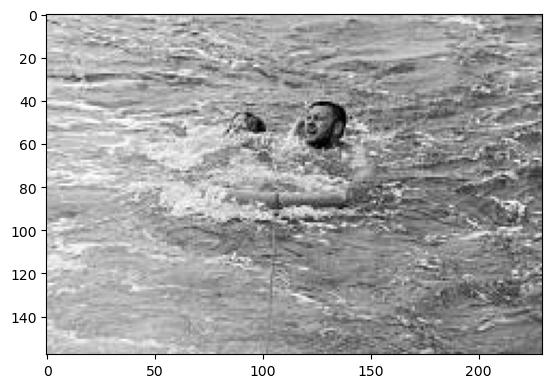

In [12]:
plt.imshow(cropped_img,cmap='gray')

In [13]:
pts1 = np.float32([[30, 30], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

In [14]:
# Imgage after applying affine transformation acc/to the given reference points

In [15]:
matrix = cv2.getAffineTransform(pts1, pts2)

In [16]:
affined_img = cv2.warpAffine(cropped_img, matrix, (cols, rows))

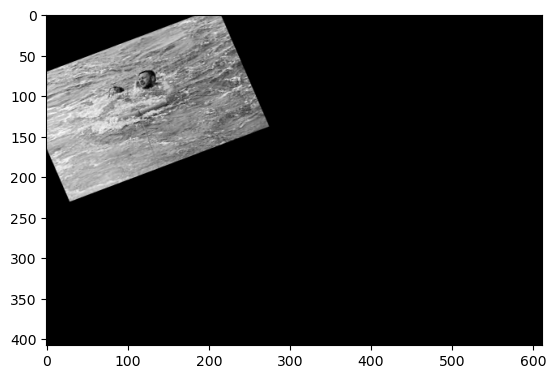

In [17]:
plt.imshow(affined_img,cmap='gray')

In [18]:
# Intensity variation using Log

In [19]:
c1 = 165 / np.log(1+np.max(img))

In [20]:
c2 = 5 / np.log(1+np.max(img))

In [21]:
log_img_1 = c1*np.log(1+cropped_img.astype(np.float32))
log_img_1 = np.uint8(log_img_1)

In [22]:
log_img_2 = c2*np.log(1+cropped_img.astype(np.float32))
log_img_2 = np.uint8(log_img_2)

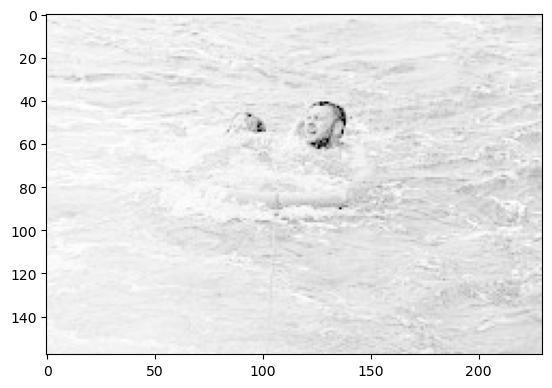

In [23]:
plt.imshow(log_img_1,cmap='gray')

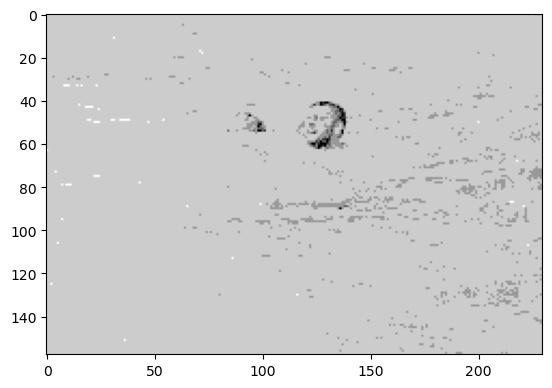

In [24]:
plt.imshow(log_img_2,cmap='gray')

In [25]:
# Intensity variation using Gamma

In [26]:
gamma = 1.5

In [27]:
c = 100 / np.log(1+np.max(img))

In [28]:
gamma_img = c*np.max(img)
gamma_img = np.uint8(gamma_img)

In [29]:
def change_brightness(image, gamma):
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

In [30]:
# brightness acc/to gamma (gamma < 1 = darker, gamma > 1 = brighter)

In [31]:
img1 = change_brightness(img, gamma=2.5)
img2 = change_brightness(img, gamma=0.2)  
img3 = change_brightness(img, gamma=1.5) 
img4 = change_brightness(img, gamma=0.5)  

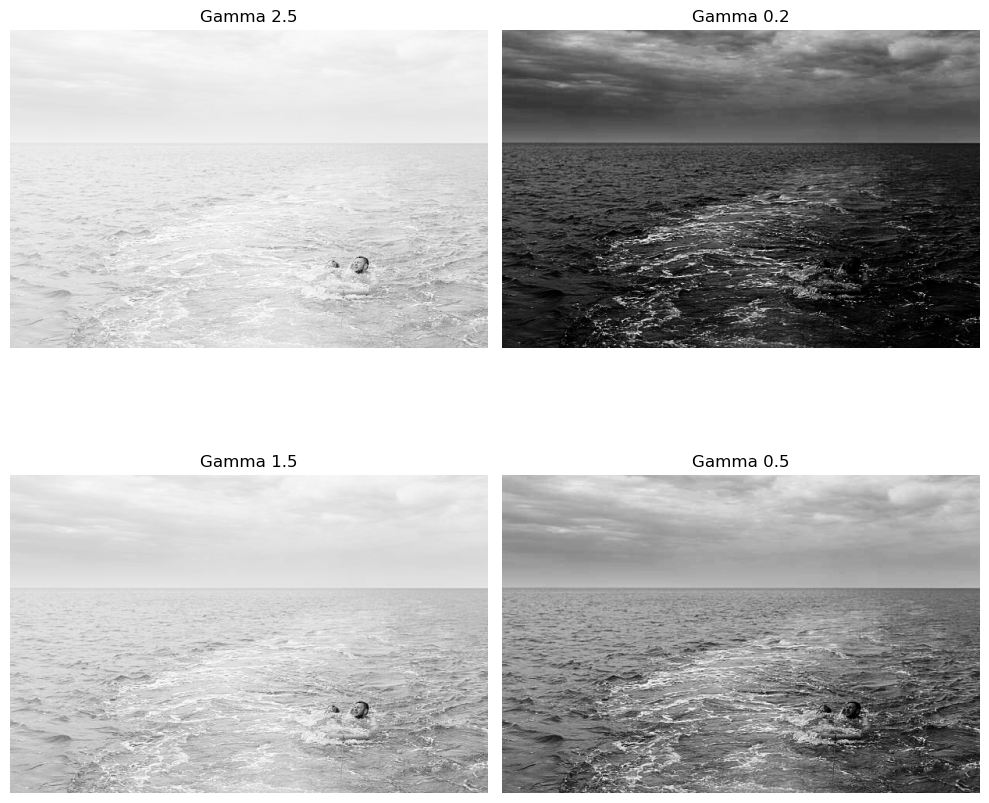

In [32]:
gamma_values = [2.5, 0.2, 1.5, 0.5]
titles = [f"Gamma {g}" for g in gamma_values]
images = [change_brightness(img, g) for g in gamma_values]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap='gray')
    ax.set_title(titles[i])
    ax.axis("off") 

plt.tight_layout()
plt.show()

In [33]:
# Negative of image

In [34]:
negative_img = 255 - img

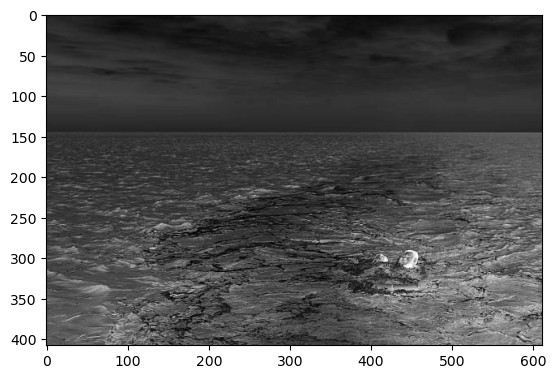

In [35]:
plt.imshow(negative_img,cmap='gray')

#### CONCLUSION : 

##### 1. x : columns , y : rows in image representation
##### 2. For changing brightness (by Log) : for the image I used above , it is giving right output between 120-170 value of 'c' 
##### 3. For changing brightness (by Gamma) : as gamma value increases image brightens otherwise the image becomes darker